22/11/2019

The code here is close to Nielsen. Each activation is treated as a column vector, even the last one which for XOR is just a simple number and is encloded in a shape (1,1) column vector of just one row, i.e if activation value of output neuron is a, then it is computed as np.array([[a]]).

Can easily adapt code here for the MLP excercises and the Iris classification problem.
But you may need to use more than 2 hidden neurons and more than 1 output neuron.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    a = sigm(z)
    return a*(1 - a)

In [ ]:
class XOR_MLP:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w2 = np.random.randn(2,2)
        self.b2 = np.random.randn(2,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,2)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
                
                
            
    

In [ ]:
xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1000
c = xor.train(epochs, 3.0)

print(xor.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])


Exercise 1: copy and adapt the above XOR_MLP code so that it uses 3 neurons in the hidden layer. Train such a MLP and see if it learns faster than the previous one.

In [ ]:
# Exercise 1
class XOR_MLP_COPY:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w2 = np.random.randn(3,2)
        self.b2 = np.random.randn(3,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,3)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost

In [ ]:
xor2 = XOR_MLP_COPY()
xs = xor2.train_inputs.T

print(xor2.feedforward(xs))
epochs = 1000
c = xor2.train(epochs, 3.0)
print(xor2.feedforward(xs))
x_axis = np.linspace(1, epochs, epochs, dtype=int)

fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])
plt.show()

In [ ]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neurond
# You must complete this code yourself
class MLP:
    def __init__(self, m, n, o):
        self.m = m
        self.n = n
        self.o = o
          
        np.random.seed(23)
        # hidden layer of N neurons
        self.w2 = np.random.randn(n,m)
        self.b2 = np.random.randn(n,1)
        
        # output layer has O neurons but code is incorrect
        # code here needs to be modified
        self.w3 = np.random.randn(o,n)
        self.b3 = np.random.randn(o,1)

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)   
        # Format the output for better readability
        formatted_output = self.format_output(a3s)
        return formatted_output         
    

    
    def backprop(self, xs, ys):
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x, y in zip(xs,ys):            
            a1 = x.reshape(self.m, 1)        # convert input vector x into (2,1) column vector
            y = y.reshape(self.o, 1)         # convert output vector y into (1,1) column vector


            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            a2 = a2.reshape(self.n, 1)       # convert a2 into (2,1) column vector
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            a3 = a3.reshape(self.o, 1)       # convert a3 into (1,1) column vector

            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
    
    def predict(self, xs):
        return self.feedforward(xs)
        
    def train(self, epochs, eta):
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(self.train_inputs ,self.train_outputs)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        plt.title('Loss Per Epochs/Iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()
        return cost
                
    def format_output(self, output):
        formatted_output = "\n".join(
            ", ".join(f"{value:.4f}" for value in row) for row in output.T
        )
        return formatted_output
                
         

In [ ]:
# Are the outputs of these correct?
p1 = MLP(3,4,2)
print('\n W2 = \n',p1.w2, '\n W3 = \n', p1.w3, '\n')

p2 = MLP(4,6,3)
print('\n W2 = \n', p2.w2, '\nW3 = \n', p2.w3, '\n')


In [ ]:
# Problem 1 : Testing MLP
p1_mlp = MLP(3,4,1)

p1_mlp.train_inputs = np.array([[0,0,1], [0,1,1], [1,0,1], [1,1,1]])
p1_mlp.train_outputs = np.array([0,1,1,0])

xs = p1_mlp.train_inputs.T

print("\nBefore Training:\n" + p1_mlp.feedforward(xs))

epochs = 2000

# The higher the learning rate the more unstale the grapgh is
#learning_rate = 10.0
learning_rate = 50.0

c = p1_mlp.train(epochs, learning_rate)

print("\nAfter Training:\n" + p1_mlp.feedforward(xs))

In [ ]:
# Problem 2 - Neural Network with 3 input and 2 output
p2_mlp = MLP(3,4,2)

p2_mlp.train_inputs = np.array([[1,1,0],
                                [1,-1,-1],
                                [-1,1,1],
                                [-1,-1,1],
                                [0,1,-1],
                                [0,-1,-1],
                                [1,1,1]])

p2_mlp.train_outputs = np.array([[1,0],
                                 [0,1],
                                 [1,1],
                                 [1,0],
                                 [1,0],
                                 [1,1],
                                 [1,1]])

xs = p2_mlp.train_inputs.T
print("\nBefore Training:\n" + p2_mlp.feedforward(xs))

epochs = 2000
learning_rate = 10.0

c = p2_mlp.train(epochs, learning_rate)
print("\nAfter Training:\n" + p2_mlp.feedforward(xs))

In [ ]:
# Problem 3 - Transportation Mode Choice
# Possible Outputs: Bus [1,0,0] │ Train [0,1,0] │ Car [0,0,1]
# Gender: 0 = Male │ 1 = Female
# Car Ownership: 0 │ 1 │ 2 
# Travel Costs: 0 = Cheap │ 1 = Standard │ 2 = Expensive
# Income: 0 = Low │ 1 = Medium │ 2 = High

p3_mlp = MLP(4,6,3)

p3_mlp.train_inputs = np.array([[0,0,0,0], 
                                [0,1,0,1], 
                                [1,1,0,1], 
                                [1,0,0,0], 
                                [0,1,0,1], 
                                [0,0,1,1], 
                                [1,1,1,1], 
                                [1,1,2,2], 
                                [0,2,2,1], 
                                [1,2,2,2]])

p3_mlp.train_outputs = np.array([[1,0,0], 
                                 [1,0,0], 
                                 [0,1,0], 
                                 [1,0,0], 
                                 [1,0,0], 
                                 [0,1,0], 
                                 [0,1,0], 
                                 [0,0,1], 
                                 [0,0,1], 
                                 [0,0,1]])

xs = p3_mlp.train_inputs.T
print("\nBefore Training:\n" + p3_mlp.feedforward(xs))
print("cost = ", str(c[-1]))

epochs = 2000
learning_rate = 10.0

c = p3_mlp.train(epochs, learning_rate)
print("\nAfter Training:\n" + p3_mlp.feedforward(xs))
print("cost = ", str(c[-1]))

# Female Test Case: Car Ownership, Standard Travel Costs, medium Income
print("\nWomen Test Case:")
test_case = np.array([1, 1, 1, 1]).reshape(4,1)
print(p3_mlp.predict(test_case))

# Copying data to dataframe and saving it to a csv file seperated by commas
p3_mlp_df = pd.DataFrame(p3_mlp.train_inputs)
p3_mlp_df.to_csv('transport.csv', sep=',', index=False, header=False)

In [ ]:
#Import and reading iris_data.csv into a dataframe
df = pd.read_csv('iris_data.csv', header=None)

#Last column is the output
training_outputs = df.iloc[:,-1]

#Converting the output to a one hot encoded vector
training_outputs = pd.get_dummies(training_outputs)

#Converting the dataframe to a numpy array
training_outputs = training_outputs.to_numpy()

#Convert y true and false to 1 and 0
training_outputs = training_outputs.astype(int)

#Drop last column from dataframe
df = df.drop(df.columns[[-1]], axis=1)

#Convert dataframe to numpy array
training_inputs = df.to_numpy()

#Clean up data
training_inputs = training_inputs.astype(float)


Outputs Before Training:
0.5609, 0.5688, 0.3651
0.5338, 0.5684, 0.3431
0.5606, 0.5653, 0.3601
0.5570, 0.5604, 0.3526
0.5715, 0.5666, 0.3712
0.5742, 0.5649, 0.3596
0.5791, 0.5600, 0.3628
0.5578, 0.5666, 0.3599
0.5544, 0.5586, 0.3481
0.5342, 0.5687, 0.3529
0.5597, 0.5708, 0.3668
0.5655, 0.5617, 0.3611
0.5319, 0.5691, 0.3518
0.5621, 0.5643, 0.3683
0.5648, 0.5751, 0.3797
0.5912, 0.5672, 0.3797
0.5822, 0.5676, 0.3696
0.5659, 0.5669, 0.3594
0.5552, 0.5710, 0.3562
0.5800, 0.5647, 0.3700
0.5358, 0.5707, 0.3478
0.5782, 0.5635, 0.3602
0.5908, 0.5648, 0.3852
0.5593, 0.5581, 0.3283
0.5614, 0.5553, 0.3540
0.5269, 0.5664, 0.3367
0.5654, 0.5611, 0.3450
0.5552, 0.5693, 0.3611
0.5488, 0.5712, 0.3585
0.5577, 0.5602, 0.3534
0.5460, 0.5622, 0.3463
0.5508, 0.5686, 0.3402
0.5868, 0.5663, 0.3890
0.5861, 0.5687, 0.3867
0.5342, 0.5687, 0.3529
0.5452, 0.5717, 0.3563
0.5409, 0.5760, 0.3600
0.5342, 0.5687, 0.3529
0.5619, 0.5607, 0.3557
0.5531, 0.5683, 0.3581
0.5713, 0.5665, 0.3633
0.5086, 0.5579, 0.3005
0.5741, 

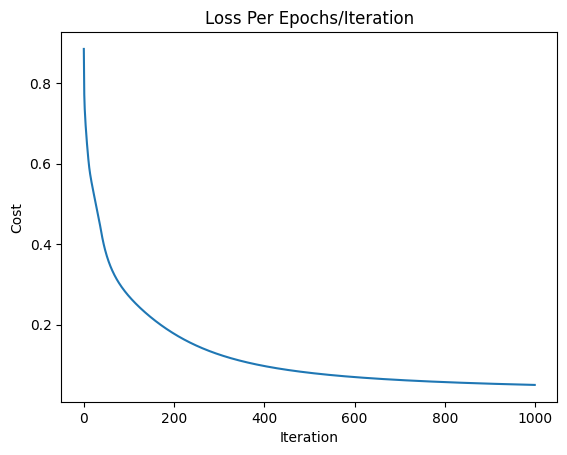

cost =  0.05063190217540465

Outputs after training:0.9718, 0.0475, 0.0041
0.9594, 0.0630, 0.0047
0.9702, 0.0505, 0.0041
0.9632, 0.0602, 0.0045
0.9736, 0.0457, 0.0040
0.9718, 0.0476, 0.0041
0.9720, 0.0489, 0.0040
0.9688, 0.0518, 0.0042
0.9612, 0.0633, 0.0046
0.9604, 0.0620, 0.0047
0.9721, 0.0466, 0.0040
0.9678, 0.0541, 0.0043
0.9611, 0.0613, 0.0046
0.9723, 0.0488, 0.0040
0.9762, 0.0408, 0.0038
0.9768, 0.0404, 0.0038
0.9756, 0.0420, 0.0038
0.9715, 0.0478, 0.0041
0.9689, 0.0501, 0.0042
0.9741, 0.0449, 0.0039
0.9590, 0.0623, 0.0047
0.9727, 0.0467, 0.0040
0.9772, 0.0412, 0.0037
0.9559, 0.0683, 0.0048
0.9575, 0.0684, 0.0047
0.9466, 0.0776, 0.0053
0.9653, 0.0565, 0.0044
0.9697, 0.0501, 0.0042
0.9694, 0.0502, 0.0042
0.9625, 0.0611, 0.0045
0.9569, 0.0671, 0.0048
0.9651, 0.0552, 0.0044
0.9766, 0.0418, 0.0038
0.9769, 0.0406, 0.0038
0.9604, 0.0620, 0.0047
0.9701, 0.0495, 0.0041
0.9711, 0.0473, 0.0041
0.9604, 0.0620, 0.0047
0.9676, 0.0550, 0.0043
0.9681, 0.0523, 0.0043
0.9732, 0.0458, 0.0040
0.908

In [216]:
iris_mlp = MLP(4,7,3)

iris_mlp.train_inputs = training_inputs
iris_mlp.train_outputs = training_outputs

xs = training_inputs.T
print("\nOutputs Before Training:\n" + iris_mlp.feedforward(xs))
print("cost = ", str(c[-1]))

epochs = 1000
learning_rate = 0.8

c = iris_mlp.train(epochs, learning_rate)
print("cost = ", str(c[-1]))
print("\nOutputs after training:\n" + iris_mlp.feedforward(xs))